# Guided Practice Data Visualization
### Matplotlib and Seaborn

Creating visualization of data is one of a data scientists most important jobs.  This is how we communicate our findings to others in the most impactful ways.

That said, HOW we construct our visualizations is almost as important as the message we are tying to communicate with them.  They have to both clearly communicate the information we want to show AND be visually pleasing to viewers.  

Today we will practice doing both by choosing the best kind of visualization to answer some questions and use the options in our graphing libraries to make sure they are easy and pleasurable to read.

Seaborn and Matplotlib.pyplot will be your primary tools for data visualization in this program.  We will be using them today to create our graphs.  Seaborn is an API for matplotlib and we can use both together to create the visualizations we we need to tell our stories.

Make sure that your graphs have:

1. Titles that communicate the purpose of the graphs
2. Axis labels that clearly describe the variables being explored
3. Colors that please the eye
4. Sizes that make them readable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Read and Clean data:

For this session we will be working with data regarding coffee tasting.  This data includes region, grower, and species, as well as aspects of the flavor and drinking experience as well as overall ratings.  We won't be using all of the data.  

Greater description can be found here: https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-07-07/readme.md


In [174]:
df = pd.read_csv("https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv")

cols = ['variety','aroma', 'flavor', 'aftertaste','acidity','body','balance',
        'uniformity','sweetness','altitude_mean_meters','total.cup.points']

df.columns = df.columns.str.lower()

df = df[cols]

df = df[df['altitude_mean_meters'] < 6000]
df = df[df['total.cup.points'] > 0]
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   variety               989 non-null    object 
 1   aroma                 989 non-null    float64
 2   flavor                989 non-null    float64
 3   aftertaste            989 non-null    float64
 4   acidity               989 non-null    float64
 5   body                  989 non-null    float64
 6   balance               989 non-null    float64
 7   uniformity            989 non-null    float64
 8   sweetness             989 non-null    float64
 9   altitude_mean_meters  989 non-null    float64
 10  total.cup.points      989 non-null    float64
dtypes: float64(10), object(1)
memory usage: 92.7+ KB


In [175]:
df.describe()

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,sweetness,altitude_mean_meters,total.cup.points
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,7.566926,7.510688,7.383741,7.521941,7.503589,7.499100,9.871769,9.931840,1322.801712,82.114853
std,0.301677,0.320824,0.330384,0.303029,0.270437,0.339979,0.446691,0.425705,469.364534,2.622705
min,5.080000,6.170000,6.170000,5.250000,6.330000,6.080000,6.000000,1.330000,1.000000,59.830000
25%,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.000000,10.000000,1100.000000,81.170000
50%,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,1310.640000,82.420000
75%,7.750000,7.670000,7.580000,7.670000,7.670000,7.670000,10.000000,10.000000,1600.000000,83.580000
max,8.750000,8.670000,8.580000,8.580000,8.420000,8.580000,10.000000,10.000000,4287.000000,89.920000


# 1. Which variety of coffee do cuppers rate most highly?

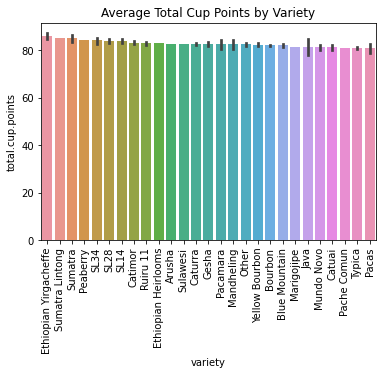

In [176]:
# sort varieties by mean total cup points.
order = df.groupby('variety').mean()['total.cup.points'].sort_values(ascending=False).index
#Plot data
sns.barplot(data=df, x='variety', y='total.cup.points', order=order)
#rotate xticks
plt.xticks(rotation=90)
plt.title('Average Total Cup Points by Variety')
plt.show()

# 2. What affects flavor more, sweetness or body? 

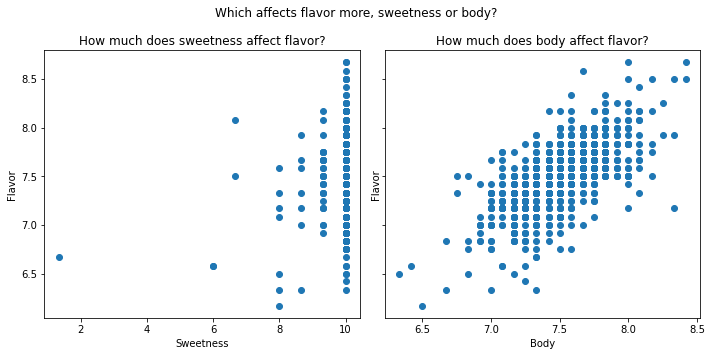

In [180]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)

axes[0].scatter(x=df['sweetness'], y=df['flavor'])
axes[0].set_title('How much does sweetness affect flavor?')
axes[0].set_xlabel('Sweetness')
axes[0].set_ylabel('Flavor')
axes[1].scatter(x=df['body'], y=df['flavor'])
axes[1].set_title('How much does body affect flavor?')
axes[1].set_xlabel('Body')
axes[1].set_ylabel('Flavor')
fig.suptitle('Which affects flavor more, sweetness or body?')
plt.tight_layout()
plt.show()
                    

# 3. Which aspect of the cupping experience most affects the total cup points?

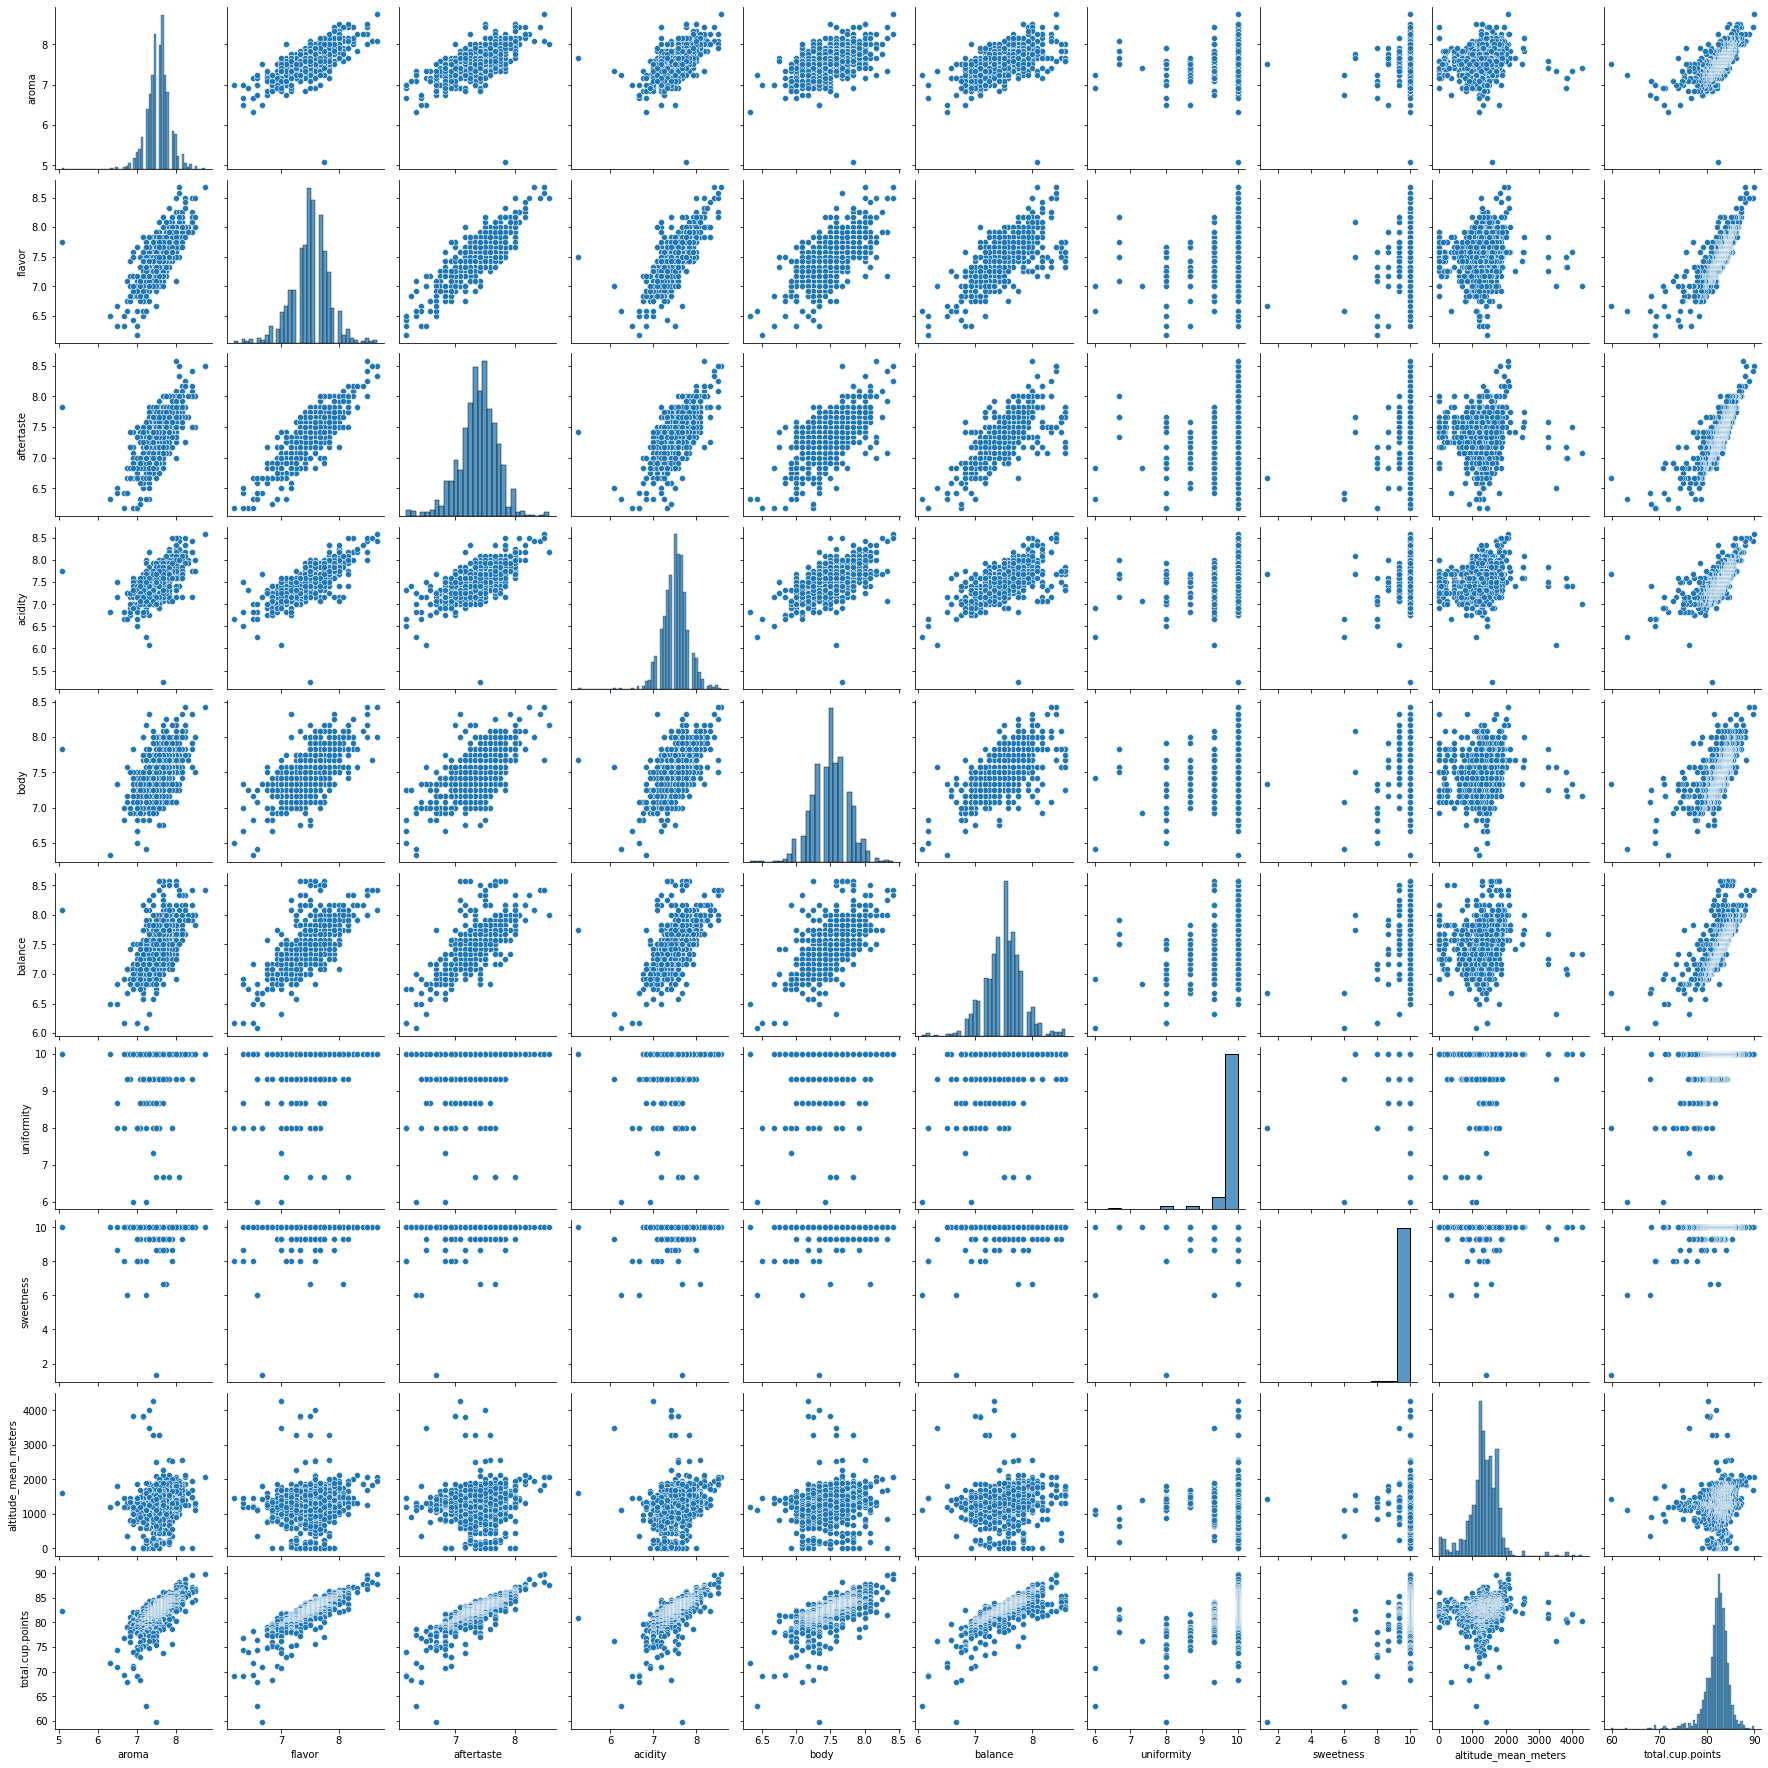

In [181]:
sns.pairplot(df)

# 4. What other questions can we answer by visualizing this data?

# Conclusion

In this notebook you practiced making informative and attractive visualizations to answer questions about data.

# [Exit Ticket](https://docs.google.com/forms/d/e/1FAIpQLScVX-8y_vNLjaxFry_wWacl2a8NhvznAQvNkmiuXmxQ6b_wKg/viewform)